In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [6]:
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [8]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [10]:
df.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [11]:
df_setosa = df.loc[df["species"]=="setosa"]
df_setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [12]:
df_versicolor = df.loc[df["species"]=="versicolor"]
df_versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [13]:
df_virginica = df.loc[df["species"]=="virginica"]
df_virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [15]:
df_numerical = df.select_dtypes(include=np.number)

In [16]:
np.mean(df_numerical, axis=0)


,0
sepal_length,4.3
sepal_width,2.0
petal_length,1.0
petal_width,0.1


In [17]:
np.max(df_numerical, axis=0)


,0
sepal_length,4.3
sepal_width,2.0
petal_length,1.0
petal_width,0.1


In [18]:
np.min(df_numerical, axis=0)

,0
sepal_length,4.3
sepal_width,2.0
petal_length,1.0
petal_width,0.1


Bi variate plotting

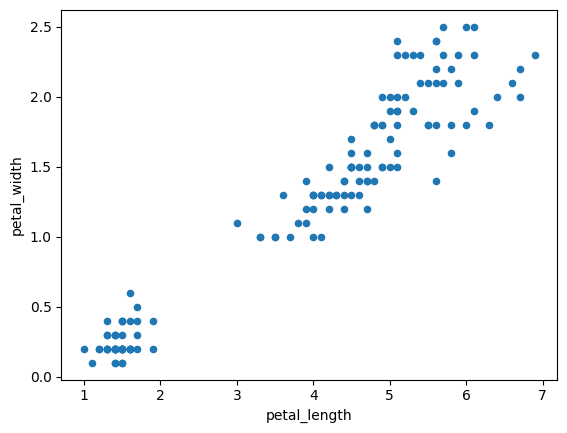

In [19]:
df.plot('petal_length','petal_width',kind="scatter")
plt.show()

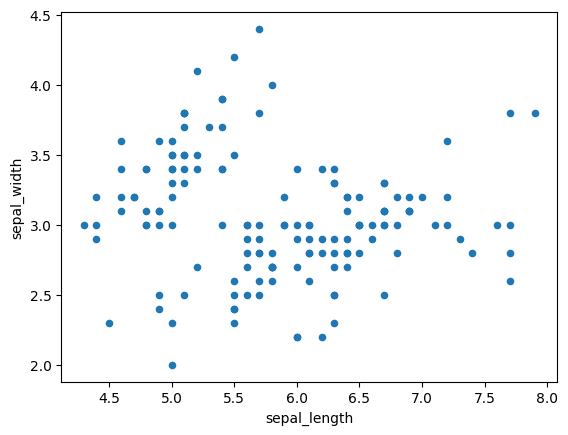

In [20]:
df.plot('sepal_length','sepal_width',kind="scatter")
plt.show()

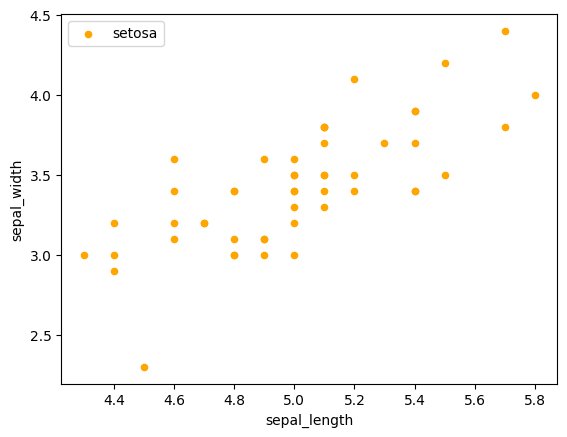

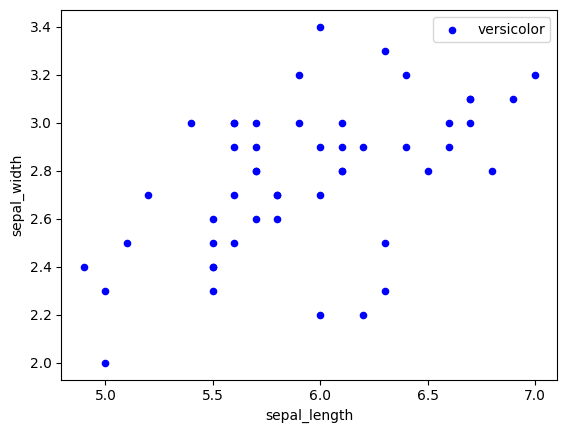

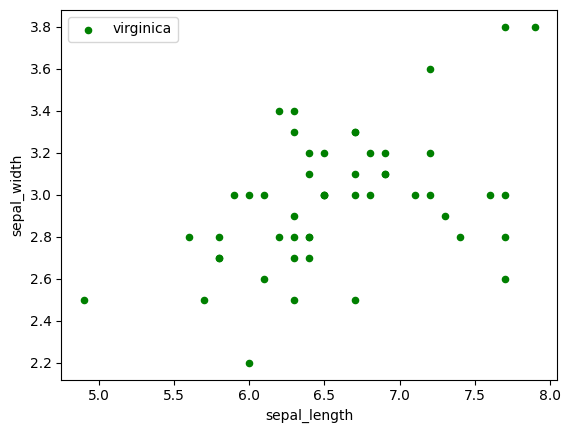

In [23]:
df_setosa.plot(x="sepal_length", y="sepal_width", kind="scatter", label='setosa',color='orange')
df_versicolor.plot(x="sepal_length",y="sepal_width",kind="scatter", label='versicolor',color='b')
df_virginica.plot(x="sepal_length", y="sepal_width", kind="scatter", label='virginica', color='g')
plt.show()

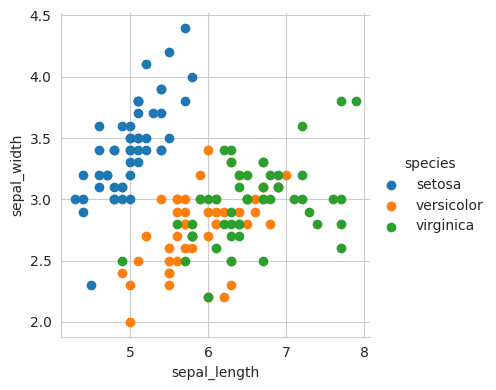

In [25]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="species", height=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

Pair plot

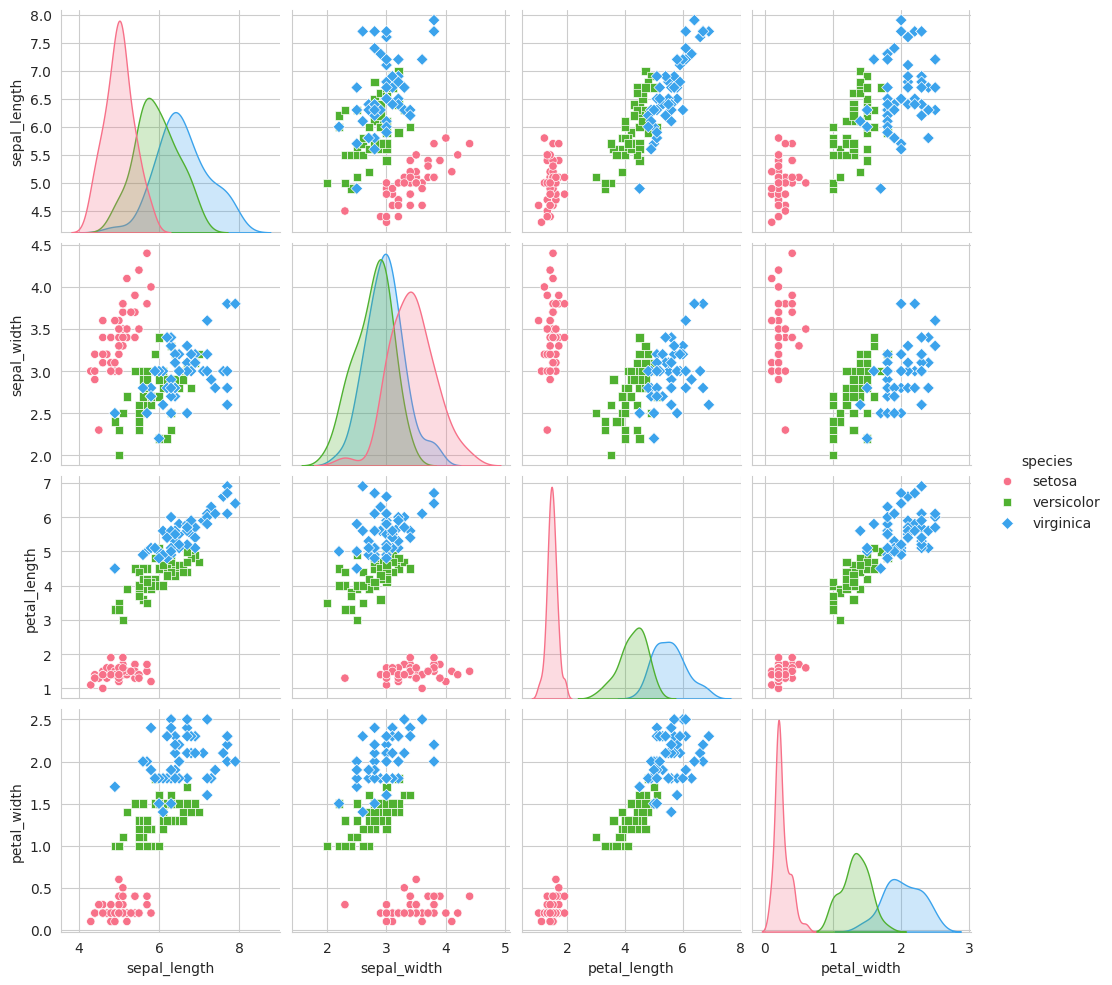

In [26]:
plt.close()
sns.set_style('whitegrid');
sns.pairplot(df, hue="species", markers=["o", "s", "D"], palette="husl")

Box Plot

<Axes: xlabel='species', ylabel='petal_width'>

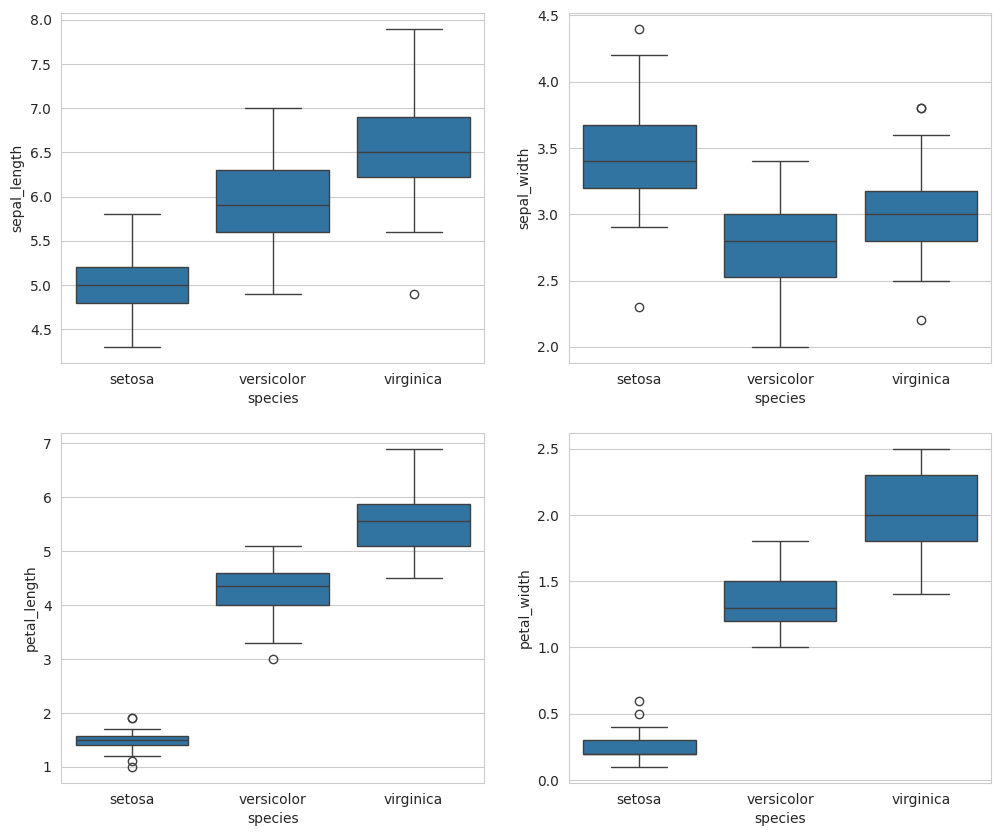

In [27]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="species",y="sepal_length",data=df)
plt.subplot(2,2,2)
sns.boxplot(x="species",y="sepal_width",data=df)
plt.subplot(2,2,3)
sns.boxplot(x="species",y="petal_length",data=df)
plt.subplot(2,2,4)
sns.boxplot(x="species",y="petal_width",data=df)

Implot

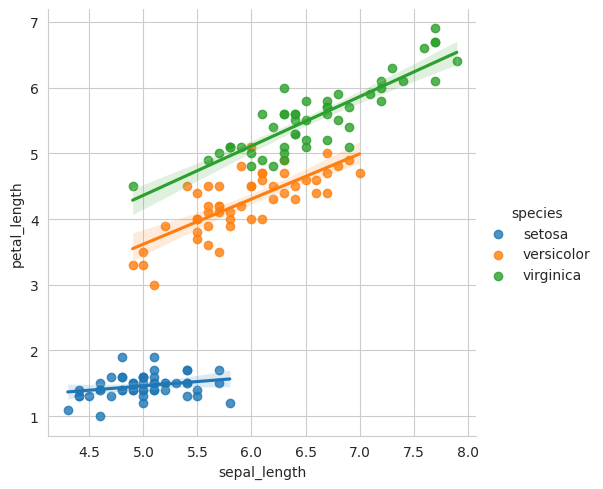

In [28]:
sns.lmplot(x='sepal_length',y='petal_length',data=df,hue='species')

<Axes: xlabel='species', ylabel='petal_width'>

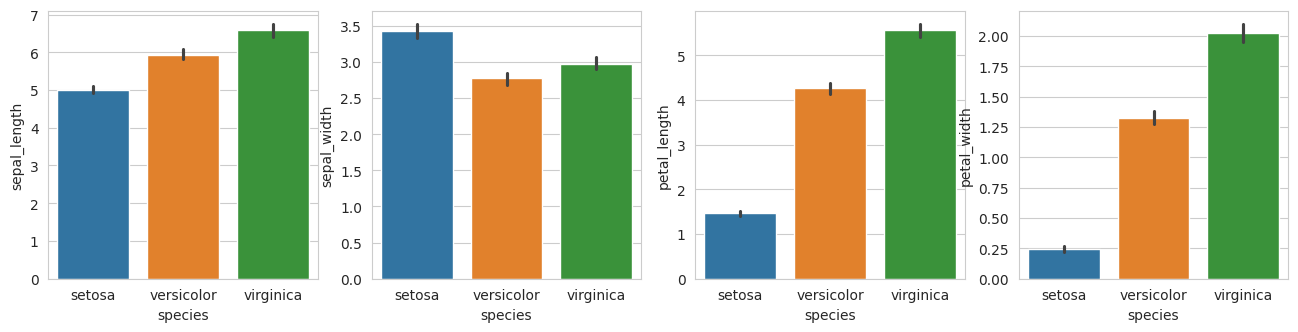

In [29]:
plt.figure(figsize=(16,16))
#
plt.subplot(4,4,1)
sns.barplot(x='species',y='sepal_length',data=df,hue='species')
plt.subplot(4,4,2)
sns.barplot(x='species',y='sepal_width',data=df,hue='species')
plt.subplot(4,4,3)
sns.barplot(x='species',y='petal_length',data=df,hue='species')
plt.subplot(4,4,4)
sns.barplot(x='species',y='petal_width',data=df,hue='species')

####From the above data , we have visualize the data and applied some standard statistical data . From the above data we can conclude various insights and categorize the species using these visual represenatations